In [289]:
import pandas as pd
import numpy as np

In [290]:
crop = pd.read_csv("Crop_recommendation.csv")

In [291]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [292]:
crop.shape

(2200, 8)

In [293]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [294]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [295]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [296]:
crop.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2195,False
2196,False
2197,False
2198,False


In [297]:
crop.duplicated().value_counts()

,count
False,2200


In [298]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [299]:
corr_matrix = crop.select_dtypes(include=['number']).corr()

<Axes: >

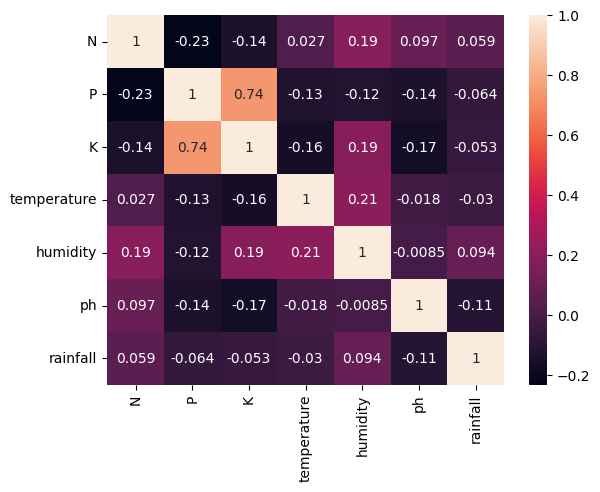

In [300]:
import seaborn as sns
sns.heatmap(corr_matrix, annot =True)

In [301]:
crop.label.value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [302]:
crop['label'].unique().size

22

In [303]:
# 22 labels means it is multiclass classification problems

<ipython-input-304-a4885907c8b4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['K'])


<Axes: xlabel='K', ylabel='Density'>

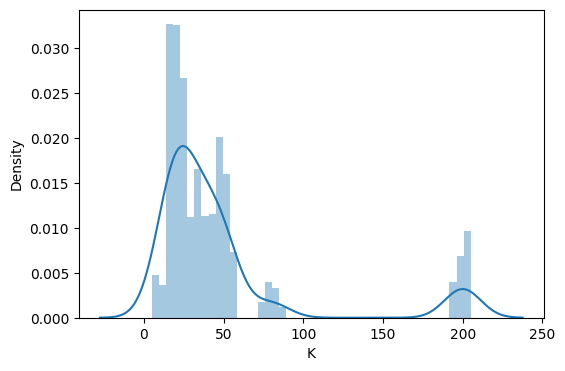

In [304]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
sns.distplot(crop['K'])

<ipython-input-305-b1ec97d88487>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


<Axes: xlabel='P', ylabel='Density'>

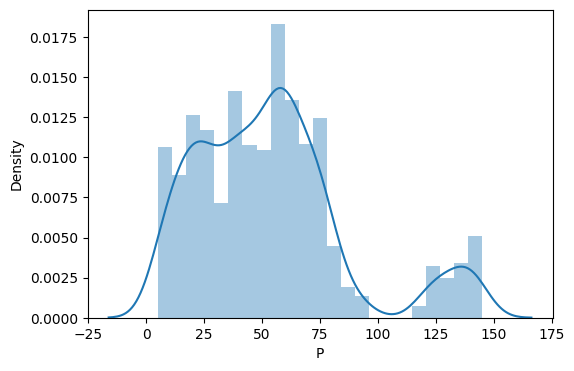

In [305]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
sns.distplot(crop['P'])

<ipython-input-306-4e5c72baafeb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


<Axes: xlabel='N', ylabel='Density'>

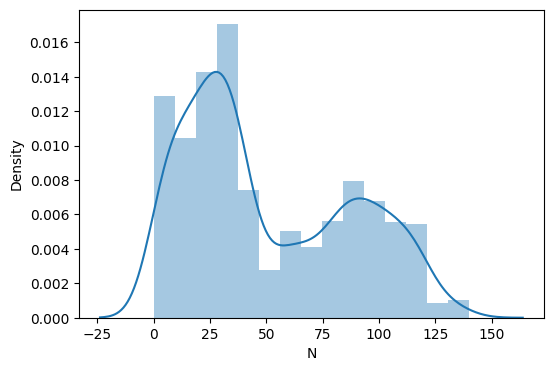

In [306]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
sns.distplot(crop['N'])

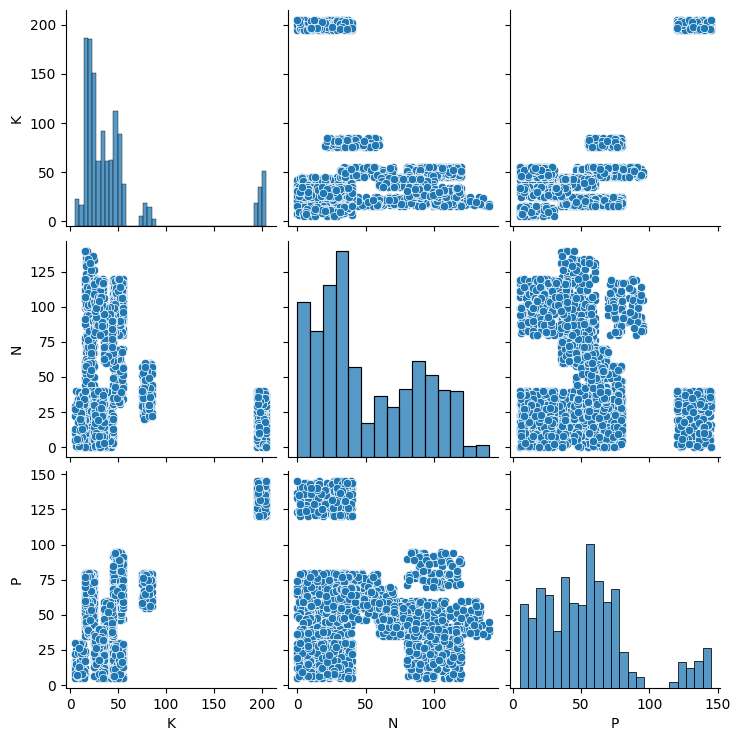

In [307]:
sns.pairplot(crop[['K', 'N', 'P']])

In [308]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [309]:
crop.label.value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [310]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'chickpea': 21,
    'kidneybeans': 20,
    'pigeonpeas' : 19,
    'mothbeans' : 18,
    'mungbean' : 17,
    'blackgram': 16,
    'lentil' : 15,
    'pomegranate' : 14,
    'banana' : 13,
    'mango' : 12,
    'grapes' : 11,
    'watermelon' : 10,
    'muskmelon' : 9,
    'apple' : 8,
    'orange' : 7,
    'papaya' : 6,
    'coconut' : 5,
    'cotton' : 4,
    'jute' : 3,
    'coffee'  : 22
}

crop['label'] = crop['label'].map(crop_dict)

In [311]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [312]:
crop.label.value_counts()

,count
label,
1,100
2,100
21,100
20,100
19,100
18,100
17,100
16,100
15,100


In [313]:
X = crop.drop('label', axis = 1)
y = crop['label']

In [314]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
# from sklearn.preprocessing import MinMaxScaler
# mx = MinMaxScaler()
# X_train = mx.fit_transform(X_train)
# X_test = mx.transform(X_test)

In [317]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [319]:
models = {
    'LR' : LogisticRegression(),
    'GNB' : GaussianNB(),
    'SVC' : SVC(),
    'KNC' : KNeighborsClassifier(),
    'DT' : DecisionTreeClassifier(),
    'ETC' : ExtraTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'BC' : BaggingClassifier(),
    'GBC' : GradientBoostingClassifier(),
    'ADA' : AdaBoostClassifier(),
}

In [320]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print(f"{name}model with accuracy : {score}")

LRmodel with accuracy : 0.9636363636363636
GNBmodel with accuracy : 0.9954545454545455
SVCmodel with accuracy : 0.9681818181818181
KNCmodel with accuracy : 0.9590909090909091
DTmodel with accuracy : 0.9840909090909091
ETCmodel with accuracy : 0.9318181818181818
RFmodel with accuracy : 0.9931818181818182
BCmodel with accuracy : 0.990909090909091
GBCmodel with accuracy : 0.9818181818181818
ADAmodel with accuracy : 0.14545454545454545


In [321]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy_score(y_test, y_pred)

0.9954545454545455

In [322]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [323]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled = sc.transform(features)
    prediction = gnb.predict(scaled).reshape(1,-1)
    return prediction[0]

In [324]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)
predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [325]:
import pickle
pickle.dump(gnb, open('model.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))